## Gérer les unités avec la librairie : `astropy`

Dans un premier temps, chargeons la librairie `astropy.units` dans une variable `u`


In [40]:
import astropy.units as u

# nous aurons aussi besoin de `numpy`
import numpy as np


### Création de variable avec une unité

Grace à cette librairie, il est possible de créér des variables en précisant l'unité. Pour cela il faut indiquer l'unité **en anglais** après la valeur numérique en piochant dans la librairie `astropy.units`. 

Vous y trouverez toutes les unités usuelles. Voici quelques exemples :

In [2]:
distance = 10 * u.km
temps = 3 * u.minute

On peut utiliser la fonction `print()`pour voir la valeur enregistrée :

In [3]:
print(distance)
print(temps)

10.0 km
3.0 min


### Calculs avec des unités :
Le plus fort est que l'on peut aussi faire des calculs, la librairie gère les convensions pour vous (même complexes) :

In [4]:
# somme de deux unités différences :
l1 = 1 * u.m
l2 = 2 * u.cm
l3 = l1 + l2
print(l3)

1.02 m


In [38]:
# différence de deux unités différentes complexes
En1 = 1 * u.joule
En2 = 3000 * u.TeV # une unité d'énergie de physique des particules

print(En1-En2)

0.9995193470098 J


In [39]:
distance = 10 * u.km
temps = 3 * u.minute

vitesse = distance / temps
print(vitesse)

3.3333333333333335 km / min


**Encore plus fort**, la gestion des angles est automatique. Prenons un exemple :

$$1^o = \frac{\pi}{180}\,\text{rad}$$

donc :

$$\sin{(1^o)} = \sin{\left(\frac{\pi}{180}\,\text{rad}\right)} = 0,01745240643728351$$

On peut vérifier si cela fonctionne correctement :

In [41]:
deg = 1 * u.deg
rad = np.pi / 180 * u.rad

print(np.sin(deg),np.sin(rad))

0.01745240643728351 0.01745240643728351


### Conversion d'unité

Biensur, ce qui serait bien est de pourvoir faire des conversions d'unités. C'est possible, grâce à la méthode `.to()` qui peut être utilisée de deux façons : 

In [7]:
vitesse.to(u.m/u.s)

<Quantity 55.55555556 m / s>

In [8]:
vitesse.to("m/s")

<Quantity 55.55555556 m / s>

Naturellement si vous voulez que le changement soit définitif, vous devez ré-affecter la variable :

In [57]:
vitesse = vitesse.to("m/s")
print(vitesse)

55.555555555555564 m / s


Pour connaitre toutes les conversions possibles d'une unité, on peut utiliser la méthode  `find_equivalent_units()`, de la façon suivante en remplaçant UNITE par l'unité demandée :

    u.UNITE.find_equivalent_units()

Voici un exemple pour les mètres :

In [60]:
u.m.find_equivalent_units()

Primary name,Unit definition,Aliases
AU,1.49598e+11 m,"au, astronomical_unit"
Angstrom,1e-10 m,"AA, angstrom"
cm,0.01 m,centimeter
earthRad,6.3781e+06 m,"R_earth, Rearth"
jupiterRad,7.1492e+07 m,"R_jup, Rjup, R_jupiter, Rjupiter"
lsec,2.99792e+08 m,lightsecond
lyr,9.46073e+15 m,lightyear
m,irreducible,meter
micron,1e-06 m,
pc,3.08568e+16 m,parsec


### Utilisation avec les autres librairies (`numpy`,`matplotlib`)

Combiner à `numpy`, il est possible de générer un `ndarray` avec une unité. 

Voici un exemple de physique, la chûte libre : 
$$z(t) = -\frac{1}{2}g\,t^2+v_0\,t+h$$

In [10]:
# ici on définit les grandeurs habituelles
g = 9.81 * u.m / (u.s)**2
v0 = 10 * u.m / u.s
h = 100 * u.m

In [11]:
# ici on génère un tableau décrivant le temps en seconde
t = np.linspace(0,10,10) * u.s

In [12]:
# ici on calcule z(t) avec la formule précédente 
z = -1/2*g*t**2 + v0*t + h
print(z)

[ 100.          105.05555556   98.           78.83333333   47.55555556
    4.16666667  -51.33333333 -118.94444444 -198.66666667 -290.5       ] m


On voit que $z(t)$ a bien la bonne dimension/unité, c'est une longueur.

Il est alors possible d'utiliser `matplotlib.pyplot`pour afficher le résultat :

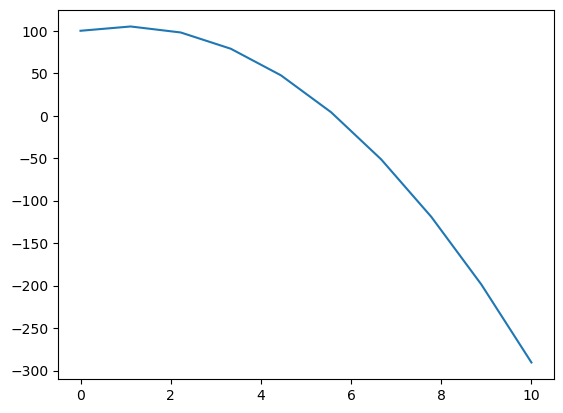

In [13]:
import matplotlib.pyplot as plt
plt.plot(t,z)

Dans le cas précédent, il faudrait soit même ajouter les unités sur les axes. Il y a une façon automatique de le faire, grâce à une autre sous librairie de `astropy` :

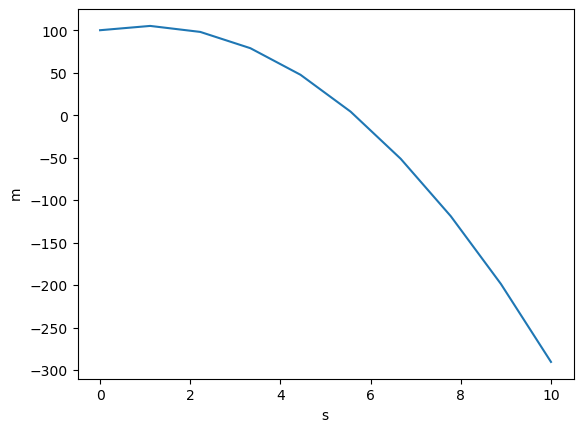

In [14]:
import astropy.visualization as visu
visu.quantity_support() # fois charger, il faut ajouter la ligne suivante pour activer la gestion des unités sur les plots

plt.plot(t,z)

### Utilisation de constantes

Dans la librairie `astropy`, il y a une sous librairie `constants` qui donne toutes les constantes fondamentales. Voici quelques exemples (de physique biensûr) : 

In [26]:
import astropy.constants as const
G = const.G
print(G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [27]:
c = const.c
print(c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


----

### Exercice 1 :

L'accélération de la pensanteur terrestre peut être approximée par :
$$ g = G\,\frac{M_T}{R_T^2}$$

* en utilisant les constantes d'astropy, calculer la valeur de $g$

### Exercice 2 :

Il faut environ 8 minutes à la lumière pour voyager du Soleil à la Terre. A partir de cela, estimer en $km$ la distance Terre-Soleil.

----

### Exercice 3 :

La pression dans un gaz parfait est donnée par la formule : 
$$P = \frac{n\,R\,T}{V}$$

Pour plus d'informations, allez voir wikipedia : <https://fr.wikipedia.org/wiki/Loi_des_gaz_parfaits>

* tracez la pression $P$ en fonction du volume $V$ pour deux valeurs de températures. On prendra $T_1 = 100\,$K et $T_2 = 200\,$K. Et on fera varier $V$ entre $1$ et $3\,$L (*liter*). On prendra $n = 1\,$mol 

* convertisser la pression pour qu'elle soit affichée en pascal et le volume en m$^3$